In [1]:
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from VirtualRatModel import VirtualRatModel
from VirtualRatSolver import VirtualRatSolver
from VirtualRatBox import VirtualRatBox
from VirtualRat import VirtualRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

W1105 23:10:26 10998 minpy.dispatch.registry:register:47] Type MXNet for name reshape has already existed
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:672: DeprecationWarning: PlainTextFormatter

In [11]:
epoch_per_loop = 100
num_loop = 101
pro_block_matrix, pro_switch_matrix, anti_block_matrix, anti_switch_matrix \
    = np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop))
for i in range(10,110,10):
    try:
        matrices = load_weights("BlockTime/BlockTime-50-"+str(i)+".pkl")
    except IOError:
        continue
    pro_block, pro_switch, anti_block, anti_switch = matrices
    pro_block_matrix = np.append(pro_block_matrix, pro_block,axis=0)
    anti_block_matrix = np.append(anti_block_matrix, anti_block,axis=0)
    pro_switch_matrix = np.append(pro_switch_matrix, pro_switch,axis=0)
    anti_switch_matrix = np.append(anti_switch_matrix, anti_switch,axis=0)
matrices = [pro_block_matrix,anti_block_matrix,pro_switch_matrix,anti_switch_matrix]

In [12]:
threshold1= 0.9
threshold2=0.7
threshold3 = 0.95
good = np.logical_and(pro_block_matrix[:,-1] > threshold1,  anti_block_matrix[:,-1] > threshold1)
bad = np.logical_not(good)
criteria1 = np.logical_or(pro_switch_matrix[:,40] < threshold2, anti_switch_matrix[:,40] < threshold2)
criteria2 = np.logical_or(pro_switch_matrix[:,95] < threshold3, anti_switch_matrix[:,95] < threshold3)
late = np.logical_or(criteria1,criteria2)
good_late = np.logical_and(good, late)
early = np.logical_not(late)
good_early = np.logical_and(good, early)

bad_pro_block = pro_block_matrix[bad,:]
bad_anti_block = anti_block_matrix[bad,:]
bad_pro_switch = pro_switch_matrix[bad,:]
bad_anti_switch = anti_switch_matrix[bad,:]
bad_matrices = [bad_pro_block, bad_pro_switch, 
                bad_anti_block, bad_anti_switch]

good_pro_block = pro_block_matrix[good,:]
good_anti_block = anti_block_matrix[good,:]
good_pro_switch = pro_switch_matrix[good,:]
good_anti_switch = anti_switch_matrix[good,:]
good_matrices = [good_pro_block, good_pro_switch, 
                good_anti_block, good_anti_switch]

late_pro_block = pro_block_matrix[good_late,:]
late_anti_block = anti_block_matrix[good_late,:]
late_pro_switch = pro_switch_matrix[good_late,:]
late_anti_switch = anti_switch_matrix[good_late,:]
late_matrices = [late_pro_block, late_pro_switch, 
                late_anti_block, late_anti_switch]

early_pro_block = pro_block_matrix[good_early,:]
early_anti_block = anti_block_matrix[good_early,:]
early_pro_switch = pro_switch_matrix[good_early,:]
early_anti_switch = anti_switch_matrix[good_early,:]
early_matrices = [early_pro_block, early_pro_switch, 
                early_anti_block, early_anti_switch]

In [13]:
print pro_block_matrix.shape
print good_pro_block.shape
print late_pro_block.shape
print early_pro_block.shape

(90, 101)
(83, 101)
(14, 101)
(69, 101)


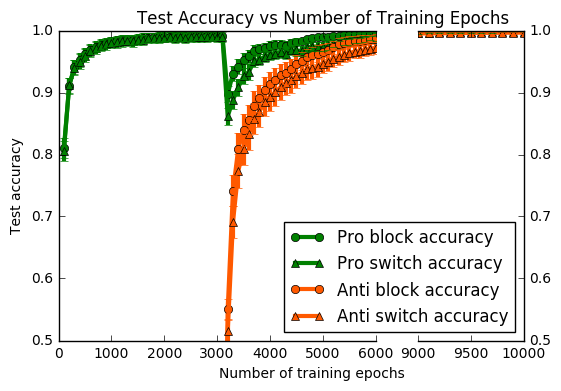

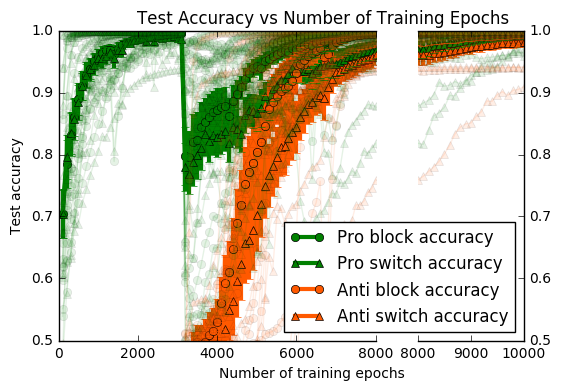

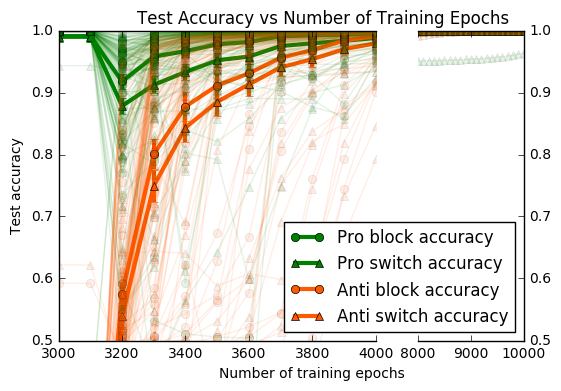

In [14]:
accuracy_vs_time(epoch_per_loop, num_loop, matrices = good_matrices, individual = False, xlim1=(0,6000), xlim2=(9000,10000))
accuracy_vs_time(epoch_per_loop, num_loop, matrices = late_matrices, individual = True, xlim1=(0,8000), xlim2=(8000,10000))
accuracy_vs_time(epoch_per_loop, num_loop, matrices = early_matrices, individual = True,  xlim1=(3000,4000), xlim2=(8000,10000))

In [15]:
threshold_edge = 0.85
large_enough = np.logical_and(pro_block_matrix > threshold_edge, anti_block_matrix > threshold_edge)
time_steps = []
for i in range(large_enough.shape[0]):
    for j in range(large_enough.shape[1]):
        if large_enough[i,j]:
            time_steps.append((i,j))
            break
print time_steps

[(1, 32), (2, 33), (3, 31), (4, 32), (5, 32), (6, 32), (8, 32), (9, 32), (10, 100), (11, 32), (12, 44), (13, 46), (14, 32), (15, 48), (16, 32), (17, 32), (18, 34), (19, 36), (20, 31), (21, 32), (22, 32), (23, 33), (24, 32), (25, 37), (26, 36), (27, 34), (28, 32), (29, 33), (30, 36), (31, 31), (32, 32), (33, 33), (34, 38), (35, 32), (36, 38), (37, 34), (38, 32), (39, 37), (40, 61), (41, 31), (42, 32), (43, 32), (44, 32), (45, 36), (46, 52), (47, 32), (48, 32), (50, 32), (51, 33), (52, 45), (53, 70), (54, 47), (55, 32), (56, 44), (57, 39), (58, 33), (59, 33), (60, 32), (61, 53), (62, 34), (63, 33), (64, 53), (65, 32), (66, 32), (67, 33), (68, 32), (69, 41), (70, 31), (71, 33), (73, 31), (74, 39), (75, 32), (76, 33), (77, 33), (78, 32), (79, 45), (80, 54), (81, 32), (82, 35), (83, 32), (84, 33), (85, 31), (86, 34), (88, 32), (89, 33)]


In [16]:
#save_weights("time_steps_for_3d-0.85.pkl",time_steps)

In [17]:
mean_pro_block = []
mean_anti_block = []
mean_pro_switch = []
mean_anti_switch = []
for i in range(len(time_steps)):
    mean_pro_block.append(pro_block_matrix[time_steps[i][0],time_steps[i][1]])
    mean_anti_block.append(anti_block_matrix[time_steps[i][0],time_steps[i][1]])
    mean_pro_switch.append(pro_switch_matrix[time_steps[i][0],time_steps[i][1]])
    mean_anti_switch.append(anti_switch_matrix[time_steps[i][0],time_steps[i][1]])
mean_pro_block_acc = np.mean(mean_pro_block)
mean_anti_block_acc = np.mean(mean_anti_block)
mean_pro_switch_acc = np.mean(mean_pro_switch)
mean_anti_switch_acc = np.mean(mean_anti_switch)

In [18]:
print mean_pro_block_acc
print mean_anti_block_acc
print mean_pro_switch_acc 
print mean_anti_switch_acc 

0.967681723763
0.930245729357
0.910932674579
0.855960564737
